In [1]:
import numpy as np
import pandas as pd
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

In [2]:
import tensorflow as tf
from tensorflow import keras

In [3]:
mnist = tf.keras.datasets.mnist

(x_train, y_train), (x_test, y_test) = mnist.load_data()
x_train, x_test = x_train / 255.0, x_test / 255.0
print("x_train.shape:", x_train.shape)

x_train.shape: (60000, 28, 28)


In [4]:
# Build the model
model = tf.keras.models.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)),  # Flatten convert multi dimensional to one dimensional
  tf.keras.layers.Dense(128, activation='relu'),
  tf.keras.layers.Dense(10, activation='softmax')
])

In [5]:
# Compile the model
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [6]:
# Train the model
r = model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=10)


Epoch 1/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2616 - accuracy: 0.9257 - val_loss: 0.1378 - val_accuracy: 0.9568
Epoch 2/10
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1154 - accuracy: 0.9661 - val_loss: 0.0938 - val_accuracy: 0.9694
Epoch 3/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0799 - accuracy: 0.9760 - val_loss: 0.0829 - val_accuracy: 0.9726
Epoch 4/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0595 - accuracy: 0.9819 - val_loss: 0.0781 - val_accuracy: 0.9777
Epoch 5/10
1875/1875 [==============================] - 6s 3ms/step - loss: 0.0443 - accuracy: 0.9863 - val_loss: 0.0714 - val_accuracy: 0.9796
Epoch 6/10
1875/1875 [==============================] - 7s 4ms/step - loss: 0.0374 - accuracy: 0.9881 - val_loss: 0.0795 - val_accuracy: 0.9768
Epoch 7/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.0280 - accuracy: 0.9915 - val_loss: 0.0741 - val_accuracy:

In [7]:
# Evaluate the model
print(model.evaluate(x_test, y_test))

313/313 [==============================] - 1s 2ms/step - loss: 0.0779 - accuracy: 0.9796
[0.07785788923501968, 0.9796000123023987]


In [8]:
ytest_predict=model.predict(x_test).argmax(axis=1)

313/313 [==============================] - 0s 1ms/step


In [9]:
ytest_predict

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [10]:
from sklearn.metrics import confusion_matrix

In [11]:
import itertools

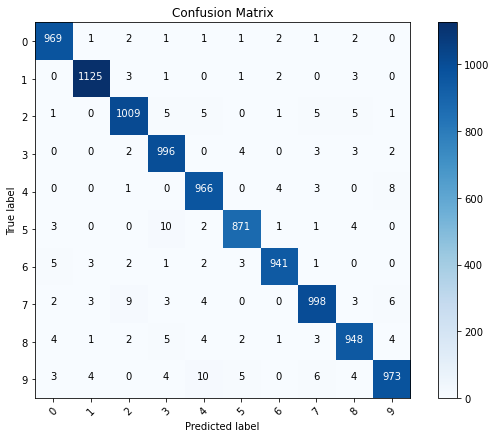

In [19]:
from sklearn.metrics import confusion_matrix
import numpy as np
import matplotlib.pyplot as plt

# Convert predicted probabilities to class labels
#y_pred = np.argmax(ytest_predict, axis=1)

# Calculate confusion matrix
cm = confusion_matrix(y_test, ytest_predict)

# Define class labels
classes = ['0', '1', '2', '3','4','5','6','7','8','9']  # Replace with your actual class labels

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
tick_marks = np.arange(len(classes))
plt.xticks(tick_marks, classes, rotation=45)
plt.yticks(tick_marks, classes)

# Add text annotations within each cell
fmt = '.0f'
thresh = cm.max() / 2.
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
    plt.text(j, i, format(cm[i, j], fmt),
             horizontalalignment="center",
             color="white" if cm[i, j] > thresh else "black")

plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.show()

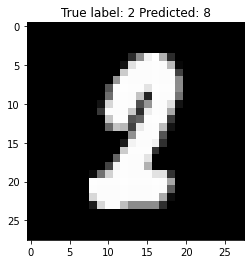

In [20]:
# Show some misclassified examples
misclassified_idx = np.where(ytest_predict != y_test)[0]
i = np.random.choice(misclassified_idx)
plt.imshow(x_test[i], cmap='gray')
plt.title("True label: %s Predicted: %s" % (y_test[i], ytest_predict[i]));

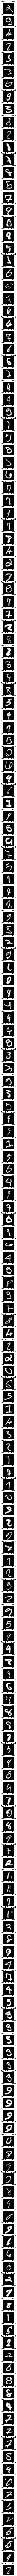

In [21]:
import matplotlib.pyplot as plt

# Define the misclassified images and labels
misclassified_images = x_test[misclassified_idx]
misclassified_labels = y_test[misclassified_idx]
predicted_labels = ytest_predict[misclassified_idx]

# Create a figure with subplots
fig, axs = plt.subplots(len(misclassified_images), 1, figsize=(8, 2 * len(misclassified_images)))

# Iterate over the misclassified images and populate the subplots
for i, (image, true_label, predicted_label) in enumerate(zip(misclassified_images, misclassified_labels, predicted_labels)):
    axs[i].imshow(image, cmap='gray')
    axs[i].set_title(f"True: {true_label}, Predicted: {predicted_label}")
    axs[i].axis('off')

# Add navigation toolbar buttons for scrolling
toolbar = plt.subplots_adjust(bottom=0.2)
plt.rcParams['toolbar'] = 'toolbar2'

# Show the plot
plt.show()